In [1]:
snr=10e3
samples=1000
mod_size=9
quant_size=0.1
hist_bins_max = 600

plot=True
debug=False

In [2]:
import pandas as pd
import numpy as np
# pd.set_option("display.max_rows",1000)
pd.set_option("display.max_columns",1000)
pd.set_option('expand_frame_repr',False)
pd.set_option('display.max_colwidth',1000)
import plotly as py
import cufflinks
py.offline.init_notebook_mode(connected=True)
# from plotly.graph_objs.layout import Slider

In [3]:
# print(__file__)
import os, sys
root_path=os.path.abspath('').replace('\\','/').rsplit('int_force',1)[0]
sys.path.append(root_path)
import int_force

In [4]:
# random cov and generate data
if 1:
    cov=int_force.rand_data.rand_data.rand_cov(snr=snr)
else:
    cov=0
cov_angle=int_force.rand_data.find_slop.get_cov_ev(cov)[1]
data = int_force.rand_data.rand_data.random_data(cov, samples)

# modulo and quantization
tmp = int_force.methods.methods.sign_mod(data, mod_size)
tmp = int_force.methods.methods.to_codebook(tmp, quant_size, 0)
tmp = int_force.methods.methods.from_codebook(tmp, quant_size, 0)

tmp.columns = [['after'] * 2, tmp.columns.values]
data.columns = [['before'] * 2, data.columns.values]
data = data.join(tmp)
del tmp

print(cov)

[[1.97009168 2.51479843]
 [2.51479843 3.21037302]]


closing picture
rmse: 0.028803


after         before           distances_angle major_distance minor_distance recovered           stat x_after_rotation y_after_rotation     error          
      X    Y         X         Y distances_angle major_distance minor_distance         X    Y  distance x_after_rotation y_after_rotation         X         Y
0  -4.3  3.6 -4.271397 -5.433672        0.947762       0.114180       6.901954      -4.3 -5.4  0.252219        -6.901954         0.114180 -0.028603  0.033672
1  -4.1  3.8 -4.088413 -5.207610        0.672003       0.077665       6.621478      -4.1 -5.2  0.210094        -6.621478         0.077665 -0.011587  0.007610
2  -3.9  4.1 -3.861895 -4.923339        0.934509       0.102140       6.261754      -3.9 -4.9  0.227375        -6.261754         0.102140 -0.038105  0.023339
3  -3.8  4.2 -3.771844 -4.814302        0.785068       0.083882       6.121516      -3.8 -4.8  0.206313        -6.121516         0.083882 -0.028156  0.014302
4  -3.8  4.2 -3.767853 -4.810495        0.785068       0.083882       6.121516      -3.8 -4.8  0.206313        -6.121516         0.083882 -0.032147  0.010495

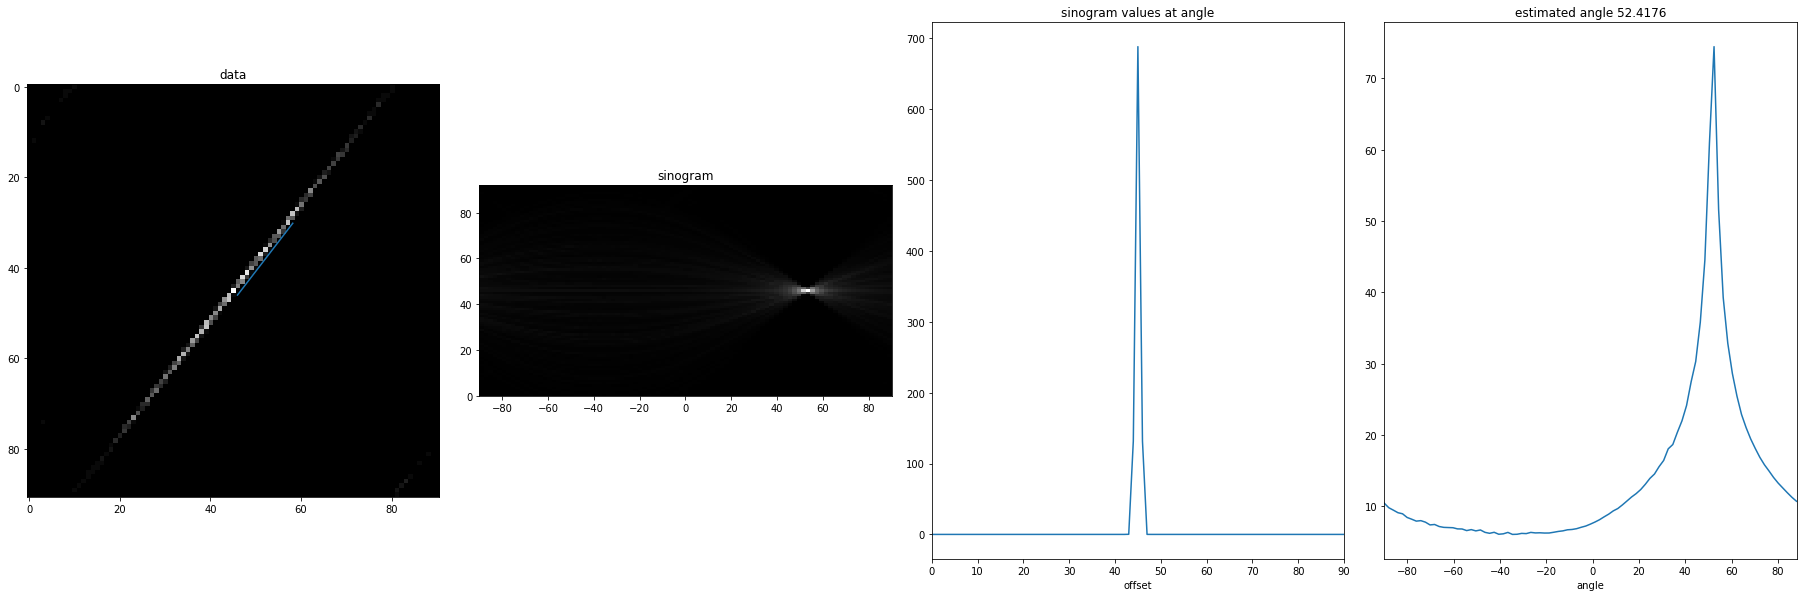

In [5]:
# doing sinogram

sinogram_dict = int_force.methods.sinogram.calc_sinogram(data.after.X.values, data.after.Y.values, hist_bins_max=hist_bins_max, plot=plot, quant_size=quant_size)
# if sum(abs(abs(sinogram_dict['angle_by_std'])-np.array([0, 90, -90])) < 5):
#     number_of_shift_per_direction = 1
# else:
#     number_of_shift_per_direction = 3
tmp = int_force.methods.sinogram.find_closest(number_of_shift_per_direction=3, data_after=data.after, mod_size=mod_size, angle_by_std=sinogram_dict['angle_by_std'],debug=debug)

data = pd.merge(tmp, data, left_on=[('remove', 'x_at_mod'), ('remove', 'y_at_mod')], right_on=[('after', 'X'), ('after', 'Y')], how='right').T.sort_index().T.drop('remove', axis=1)
del tmp
error=data.recovered - data.before
error.columns = [['error']*2, error.columns.values]
data = data.join(error)
del error
mse = data.error.pow(2).values.mean()
rmse=mse ** 0.5
print('rmse: %f'%rmse)
data.head()